# Imports



In [2]:
pip install columnar #package to print table of data 

In [3]:
from collections import defaultdict
import sys
import math
import time
import heapq
import gc
import zipfile
from time import perf_counter_ns
import os
import matplotlib.pyplot as plt
from columnar import columnar


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with zipfile.ZipFile('/content/drive/MyDrive/mst_dataset.zip', 'r') as zip_ref:

     zip_ref.extractall('/content/')

# Classes and handy functions

In this section we define some useful classes and functions for our algorithm implementations.

In [6]:
class Graph():
  def __init__ (self):
    self.V=[]
    self.E=[]
    self.adjacency_list = defaultdict(list)

  def add_vertex(self,v):
    self.V.append(v)

  def remove_vertex (self,v):
    self.V.remove(v)

  def add_edge(self, source_node, destination_node, weight):
    # First case
    # We add the source and the destination node only if the are not already present
    if (source_node not in self.V):
      self.V.append(source_node)
    
    if (destination_node not in self.V):
      self.V.append(destination_node)
    
    # Now we can add the edge
    edge = (source_node, destination_node, weight)
    self.E.append(edge)

    # Now we update the graph
    self.adjacency_list[source_node].append((destination_node,weight))
    if (source_node != destination_node):
      self.adjacency_list[destination_node].append((source_node,weight))
  
  def get_edges(self):
    return self.E

  def get_vertices(self):
    return self.V
  
  def get_value(self,key):
    return self.adjacency_list[key]

  def sort_edges(self):
    self.E.sort(key=lambda x:x[2])

  def print_data(self):
    print(self.adjacency_list.items())

In [7]:
def read_input_graph(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    if (index==0):
      graph = Graph()
      size = text_splitted[0]
    else:
      graph.add_edge(int(text_splitted[0]),int(text_splitted[1]),int(text_splitted[2]))
  f.close()
  return graph,int(size)

In [8]:
def read_input_times(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  sizes = []
  times = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    sizes.append(int(text_splitted[0]))
    times.append(int(text_splitted[1]))
  return times,sizes

In [9]:
def read_input_data(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  num_verteces = []
  num_edges = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    num_verteces.append(int(text_splitted[0]))
    num_edges.append(int(text_splitted[1]))
  return num_verteces,num_edges

# Naive Kruscal's Algorithm

The method *is_acyclic* verifies if there exists a path between the source node and the destination node. To check the condition, it calls the method exists_path.
To iterate the graph, the method *exists_path* calls the function *dfs*. 

The function *dfs* does a Depth First Search in the graph G.

In [10]:
def is_acyclic(A,source_node,destination_node):
  if (source_node!=destination_node):
    if (source_node not in A.V or destination_node not in A.V):
      return True
    elif (not exists_path(A,source_node,destination_node)):
      return True
    else:
      return False
  else:
    return False

In [11]:
def exists_path(G,source_node,destination_node):
  visited = [False]*(len(G.V)+1)
  if (source_node==destination_node):
    return True
  result = dfs(G, source_node, destination_node, visited)
  return result

In [12]:
def dfs(G, current_node, destination_node, visited):
  if destination_node == current_node:
    return True
  visited[current_node] = True
  for neighbour in G.get_value(current_node):
    # neighbour is a tuple which has two value, the first is the destination and the second is the weight
    next_node = neighbour[0]
    if (visited[next_node]==False and dfs(G,next_node,destination_node,visited)):
      return True
  return False

In [13]:
def KruskalMST(G):
  A = Graph() #A is empty
  A.V = [None]*(len(G.V)+1) # We initialize A to the size of G.
  sorted_edges= G.E
  sorted_edges.sort(key=lambda x:x[2]) # Sort the edges according to the weight.
  for edge in sorted_edges:
    if (is_acyclic(A,edge[0],edge[1])):
      src = edge[0]
      dest = edge[1]
      weight = edge[2]
      A.add_edge(src,dest,weight)
  return A

# Measuring the algorithm's complexity

In [14]:
def measure_run_time(num_iterations,input_directory,weights):
  sum_times = 0.0
  i = 0
  sizes = []
  run_times = []
  for file in sorted(os.listdir(input_directory)):
    print("------------------------------------------------------------------------")
    file_path = f"{input_directory}/{file}"
    graph,size = read_input_graph(file_path)
    gc.disable() 
    start_time = perf_counter_ns() 
    mst = KruskalMST(graph)
    end_time = perf_counter_ns()
    weight = compute_weight(mst)
    weights.append(weight)
    total_time = end_time-start_time
    run_times.append(total_time)
    print(f"Total weight of minimum spanning tree using Naive Kruskal Algorithm is: {weight}, in {total_time}")
    sizes.append(size)
    gc.enable()
    i +=1

  # return running time in nanoseconds
  return run_times,sizes

The method *compute_weight* computes the weight of the graph which is given as parameter. 

The method iterates the graph and keeps inside the vector *edges_checked* the edges for the which we have already saved the weight. If an edge is not inside *edges_checked*, it takes its weight.
As final step, it return the total weight of the graph.

In [15]:
def compute_weight(G):
  weight = 0
  edges_checked = []
  for v in (G.get_vertices()):
    for neighbour in (G.get_value(v)):
      edge_to_check = (v,neighbour[0])
      edge_to_check_inv = (neighbour[0],v)
      if (edge_to_check not in edges_checked):
        edges_checked.append(edge_to_check)
        edges_checked.append(edge_to_check_inv)
        weight+=neighbour[1]
  return weight

In [ ]:
num_iterations = len(os.listdir('mst_dataset\mst_dataset'))
weights = []
run_times,sizes = measure_run_time(num_iterations,'mst_dataset\mst_dataset', weights)

------------------------------------------------------------------------
Reading file input_random_01_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 29316, in 67700
------------------------------------------------------------------------
Reading file input_random_02_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 16940, in 73100
------------------------------------------------------------------------
Reading file input_random_03_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: -44448, in 67500
------------------------------------------------------------------------
Reading file input_random_04_10.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: 25217, in 57400
------------------------------------------------------------------------
Reading file input_random_05_20.txt
Total weight of minimum spanning tree using Naive Kruskal Algorithm is: -32021, in 159100
------------

In [238]:
print(run_times)

[57400, 67500, 67700, 73100, 147500, 159100, 164500, 218500, 627600, 873500, 1049000, 1180600, 2028400, 2625700, 2681600, 2915600, 3181000, 3580300, 5443400, 5969600, 13650200, 22254800, 23362500, 53801000, 49103600, 53914500, 64298700, 76067100, 175729900, 192820200, 227401400, 231357000, 274804000, 281717000, 309225700, 344536200, 1010170100, 11258307000, 1698233000, 1847364900, 4436053000, 5367858400, 7195264600, 8431494800, 17636265300, 19352986400, 21684315700, 23460017300, 33874352600, 35317255500, 39750045700, 46120617700, 178664701200, 180565205200, 185494193500, 189470755100, 610688580000, 634440069700, 641447148000, 762544720500, 2502841562220, 2694526828500, 2752337104100, 2807344424400, 4249558040900, 4278089144000, 4368828853700, 4457202935600]


In [16]:
run_times,sizes = read_input_times('/content/naive_kruskal_tuples.txt')
print(run_times)
print(sizes)

[57400, 67500, 67700, 73100, 147500, 159100, 164500, 218500, 627600, 873500, 1049000, 1180600, 2028400, 2625700, 2681600, 2915600, 3181000, 3580300, 5443400, 5969600, 13650200, 22254800, 23362500, 53801000, 49103600, 53914500, 64298700, 76067100, 175729900, 192820200, 227401400, 231357000, 274804000, 281717000, 309225700, 344536200, 1010170100, 1258307000, 1698233000, 1847364900, 4436053000, 5367858400, 7195264600, 8431494800, 17636265300, 19352986400, 21684315700, 23460017300, 33874352600, 35317255500, 39750045700, 46120617700, 178664701200, 180565205200, 188494193500, 191470755100, 610688580000, 634440069700, 641447148000, 762544720500, 2502841562220, 2694526828500, 2752337104100, 2807344424400, 4249558040900, 4278089144000, 4368828853700, 4457202935600]
[10, 10, 10, 10, 20, 20, 20, 20, 40, 40, 40, 40, 80, 80, 80, 80, 100, 100, 100, 100, 200, 200, 200, 200, 400, 400, 400, 400, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 4000, 4000, 4000, 4000, 8000, 8000, 8000

In [22]:
tuples = []
for size,runtime in zip(sizes,run_times):
  tuples.append((size,runtime))
tuples.sort(key=lambda y:y[0])

In [21]:
print("Size\tTime(ns)")
print(20*"-")
for i in range(len(sizes)):
  print(tuples[i][0], tuples[i][1], sep="\t")
(20*"-")

Size	Time(ns)
--------------------
10	57400
10	67500
10	67700
10	73100
20	147500
20	159100
20	164500
20	218500
40	627600
40	873500
40	1049000
40	1180600
80	2028400
80	2625700
80	2681600
80	2915600
100	3181000
100	3580300
100	5443400
100	5969600
200	13650200
200	22254800
200	23362500
200	53801000
400	49103600
400	53914500
400	64298700
400	76067100
800	175729900
800	192820200
800	227401400
800	231357000
1000	274804000
1000	281717000
1000	309225700
1000	344536200
2000	1010170100
2000	1258307000
2000	1698233000
2000	1847364900
4000	4436053000
4000	5367858400
4000	7195264600
4000	8431494800
8000	17636265300
8000	19352986400
8000	21684315700
8000	23460017300
10000	33874352600
10000	35317255500
10000	39750045700
10000	46120617700
20000	178664701200
20000	180565205200
20000	188494193500
20000	191470755100
40000	610688580000
40000	634440069700
40000	641447148000
40000	762544720500
80000	2502841562220
80000	2694526828500
80000	2752337104100
80000	2807344424400
100000	4249558040900
100000	4278089

'--------------------'

In [29]:
num_vertices, num_edges = read_input_data("/content/vertices-edges.txt")
print(num_vertices)
print(num_edges)

[10, 10, 10, 10, 20, 20, 20, 20, 40, 40, 40, 40, 80, 80, 80, 80, 100, 100, 100, 100, 200, 200, 200, 200, 400, 400, 400, 400, 800, 800, 800, 800, 1000, 1000, 1000, 1000, 2000, 2000, 2000, 2000, 4000, 4000, 4000, 4000, 8000, 8000, 8000, 8000, 10000, 10000, 10000, 10000, 20000, 20000, 20000, 20000, 40000, 40000, 40000, 40000, 80000, 80000, 80000, 80000, 100000, 100000, 100000, 100000]
[9, 11, 13, 10, 24, 24, 28, 26, 56, 50, 50, 52, 108, 99, 104, 114, 136, 129, 137, 132, 267, 269, 269, 267, 540, 518, 538, 526, 1063, 1058, 1076, 1049, 1300, 1313, 1328, 1344, 2699, 2654, 2652, 2677, 5360, 5315, 5340, 5368, 10705, 10670, 10662, 10757, 13301, 13340, 13287, 13311, 26667, 26826, 26673, 26670, 53415, 53446, 53242, 53319, 106914, 106633, 106586, 106554, 133395, 133214, 133524, 133463]


Naive Kruskal's has a complexity of 
 **O(*m* *n*)**, where m is the number of edges and n is the number of vertices. 
 
T(N) = c* m * n, so we can find our *c_estimate* by dividing the *running_time* by m*n.

In [30]:
sorted_sizes = list(zip(*tuples))[0]
sorted_runtimes = list(zip(*tuples))[1]

ratios = [None] + [round(tuples[i+1][1]/tuples[i][1],3) for i in range(len(sizes)-1)]
c_estimates = [round((run_time)/(m*n),3) for run_time,m,n in zip(sorted_runtimes,num_edges,num_vertices)]
headers = ["Size","Time","Constant","Ratio"]
data=[]
for i in range(len(sizes)):
  data.append([tuples[i][0], tuples[i][1], c_estimates[i], ratios[i]]) 
table = columnar(data,headers, no_borders= True)
print(table)

          
  SIZE    TIME           CONSTANT  RATIO  
    
  10      57400          637.778   None   
  10      67500          613.636   1.176  
  10      67700          520.769   1.003  
  10      73100          731.0     1.08   
  20      147500         307.292   2.018  
  20      159100         331.458   1.079  
  20      164500         293.75    1.034  
  20      218500         420.192   1.328  
  40      627600         280.179   2.872  
  40      873500         436.75    1.392  
  40      1049000        524.5     1.201  
  40      1180600        567.596   1.125  
  80      2028400        234.769   1.718  
  80      2625700        331.528   1.294  
  80      2681600        322.308   1.021  
  80      2915600        319.693   1.087  
  100     3181000        233.897   1.091  
  100     3580300        277.543   1.126  
  100     5443400        397.328   1.52   
  100     5969600        452.242   1.097  
  200     13650200       255.622   2.287  
  200     22254800       413.658   1.6

In [31]:
c = sum(c_estimates)/len(c_estimates)
c

337.8254117647059

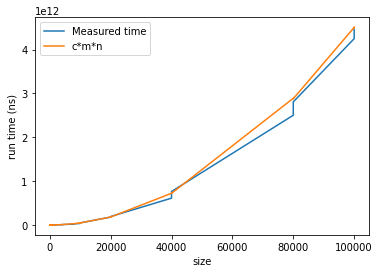

In [35]:
reference = [c*m*n for n,m in zip(sorted_sizes,num_edges)]
plt.yscale("linear")

plt.plot(sorted_sizes, sorted_runtimes)
plt.plot(sorted_sizes, reference)

plt.legend(["Measured time", "c*m*n"])

plt.ylabel('run time (ns)')
plt.xlabel('size')

plt.savefig('naive_kruskal_plot.png', dpi=300)

plt.show()